<a href="https://colab.research.google.com/github/swarnava-96/Time-Series/blob/main/DARTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time Series Forecast using DARTS**

In [1]:
# Installing darts
!pip install darts

  Using cached matplotlib-3.4.3-cp37-cp37m-manylinux1_x86_64.whl (10.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# Importing the datasets from the library itself
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [3]:
# Lets check the datasets
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

In [4]:
MonthlyMilkDataset().load().pd_series()

Month
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
              ...  
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Length: 168, dtype: float64

In [5]:
# I had to uninstall the matplotlib version present with colab, as I was having some problems plotting
!python -m pip uninstall matplotlib

Found existing installation: matplotlib 3.4.3
Uninstalling matplotlib-3.4.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.4.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.4.3


In [6]:
# Insalling the matplotlib version 3.1.3
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
darts 0.12.0 requires matplotlib>=3.4.0, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


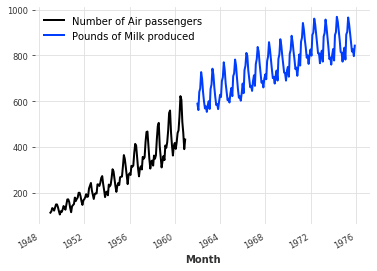

In [7]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label = "Number of Air passengers")
series_milk.plot(label = "Pounds of Milk produced")
plt.legend()

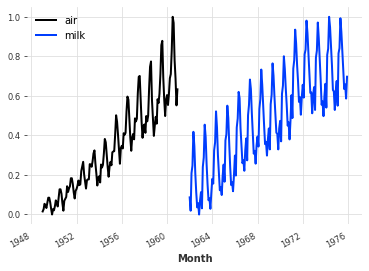

In [8]:
# Feature scaling
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

# Visualization
series_air_scaled.plot(label = "air")
series_milk_scaled.plot(label = "milk")
plt.legend();

In [9]:
# Train test split
train_air, test_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, test_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [12]:
# Importing the dependencies
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [13]:
# Model Building
model_air_milk = NBEATSModel(input_chunk_length = 24, output_chunk_length = 12, n_epochs = 100, random_state = 0)

In [14]:
# Model Training
model_air_milk.fit([train_air, train_milk], verbose = True)

[2021-09-26 08:51:31,669] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 08:51:31,669] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 194 samples.
[2021-09-26 08:51:31,798] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
[2021-09-26 08:51:31,798] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64. If training is too slow you can try casting your data to 32-bits.
  1%|          | 1/100 [00:01<02:33,  1.55s/it]

 11%|█         | 11/100 [00:16<02:12,  1.49s/it]

 21%|██        | 21/100 [00:45<04:24,  3.35s/it]

 31%|███       | 31/100 [01:20<03:52,  3.36s/it]

 41%|████      | 41/100 [01:57<03:23,  3.45s/it]

 51%|█████     | 51/100 [02:31<02:54,  3.57s/it]

 61%|██████    | 61/100 [03:06<02:29,  3.83s/it]

 71%|███████   | 71/100 [03:41<01:40,  3.47s/it]

 81%|████████  | 81/100 [04:16<01:08,  3.61s/it]

 91%|█████████ | 91/100 [04:52<00:35,  3.93s/it]

100%|██████████| 100/100 [05:22<00:00,  3.22s/it]


MAPE = 5.506340000036997


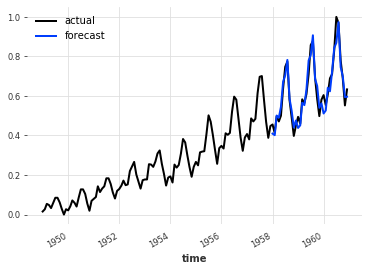

In [19]:
# Prediction for air
pred = model_air_milk.predict(n = 36, series = train_air)

# Visualization for air predicted vs actual
series_air_scaled.plot(label = "actual")
pred.plot(label = "forecast")
plt.legend();
print("MAPE = {}".format(mape(series_air_scaled, pred)))

MAPE = 11.748386100675006


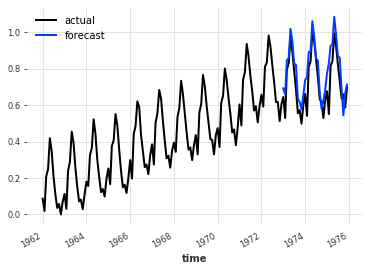

In [20]:
# Predictio for milk
pred = model_air_milk.predict(n = 36, series = train_milk)

# Visualization for milk predicted vs actual
series_milk_scaled.plot(label = "actual")
pred.plot(label = "forecast")
plt.legend();
print("MAPE = {}".format(mape(series_milk_scaled,pred))) 